## Project Title: Mug Material Classifier(SVM)
### Project Description:
Consider again the problem where wewant to predict the type of material of a mug based on four measurements, namely the height, diameter, weight, and hue (color). To make this into a 2 class problem, will here consider a ”one-against-all” classification scenario where we predict whether the material is ”Plastic” or not (We do not address the other cases of the ”one-against-all” classification scenario, i.e. we do not learn additional binary ”Metal” or not and ”Ceramic” or not classifiers). To evaluate the learned classifier we will split the larger dataset into a test set containing the first 6 examples of each of the materials and a training set that contains the remaining data points.

a) Useing SVM solverto learn the linear SVM parameters for this problem (linear here means that we are not using a kernel function). Since this data is not linearly separable, need to use a non-zero value for the regularization weight C (can use the default value or experiment with different values to see the differences). Showing the classification accuracy achieved on both the test and the training set and indicating if system is overfitting. Plot the data points and the resulting decision boundary’s projection in the 3-dimensional height/diameter/weight space (ignoring ”hue”). Can do this by plotting the 2-D projections of this 3D space onto the 2D subspaces height/diameter, height/weight, and diameter/weight. Also identify the support vectors in this problem.

b) Repeat the classification experiment of part a) but using the SVM with Gaussian Kernels to allow a non-linear decision boundary. In this case you have two parameters, namely the regularization weight C and the standard deviation for the Gaussian Kernels,. Can use the default values or experiment with different values to see the difference in classification accuracy and overfitting. Indicate the accuracy achieved on the test and training set and whether we observe overfitting. Compare the results with the ones for the linear SVM and discuss your observations. Also show the classification results by plotting the data points, colored by whether they fall into the positive (”Plastic”) or negative class in the 3-dimensional height/diameter/weight space (ignoring ”hue”). You can do this again by plotting the 2-D projections of this 3D space onto the 2D subspaces height/diameter, height/weight, and ”diameter/weight” (note that since the decision boundary is highly non-linear, you do not have to plot the actual decision boundary which will be between the two colors of the points. Finally, identify the support vectors in this problem.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# Load data
train_data = pd.read_csv('data_train.csv')
test_data = pd.read_csv('data_test.csv')

In [25]:
# Printing train data head
pd.read_csv('data_train.csv').head()

,Height,Diameter,Weight,Hue,Type
0,0.088219,0.105612,0.365148,2.848540,Metal
1,0.080031,0.030000,0.175270,5.704520,Ceramic
2,0.121246,0.113986,0.577712,1.819411,Metal
3,0.127920,0.121948,0.350669,2.452736,Plastic
4,0.079819,0.075180,0.240520,2.479921,Metal


In [26]:
# Printing test data head
pd.read_csv('data_test.csv').head()

,Height,Diameter,Weight,Hue,Type
0,0.121040,0.126502,0.343961,4.350362,Plastic
1,0.167861,0.150000,0.593048,2.964762,Plastic
2,0.076760,0.030000,0.112163,3.814482,Metal
3,0.169580,0.144642,0.517608,3.360588,Plastic
4,0.093277,0.088731,0.360680,2.935963,Metal


In [3]:
# Preprocess data
def preprocess_data(data):
    X = data[['Height', 'Diameter', 'Weight', 'Hue']]
    y = data['Type'].apply(lambda x: 1 if x == 'Plastic' else 0)
    return X, y

In [4]:
X_train, y_train = preprocess_data(train_data)
X_test, y_test = preprocess_data(test_data)

In [5]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Train a linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train[:, :3], y_train)

SVC(C=1, kernel='linear')

In [7]:
# Evaluate the classifier
train_acc = accuracy_score(y_train, svm_linear.predict(X_train[:, :3]))
test_acc = accuracy_score(y_test, svm_linear.predict(X_test[:, :3]))

print(f"Linear SVM: Training accuracy = {train_acc:.4f}, Test accuracy = {test_acc:.4f}")

Linear SVM: Training accuracy = 0.9912, Test accuracy = 1.0000


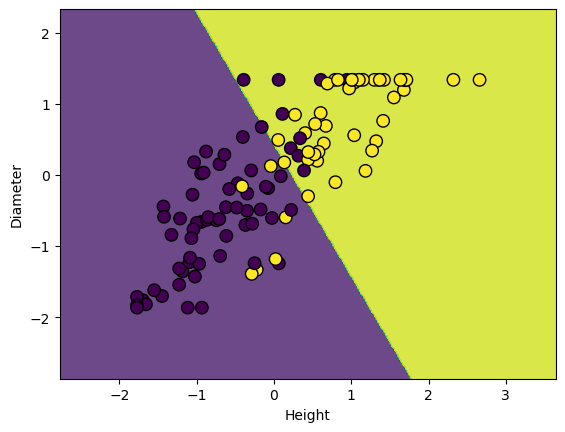

In [8]:
# Plot decision boundaries
def plot_decision_boundaries(svm, X, y, projection):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel(), projection * np.ones_like(xx.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80)
    plt.xlabel('Height')
    plt.ylabel('Diameter')

plot_decision_boundaries(svm_linear, X_train[:, :2], y_train, X_train[:, 2].mean())
plt.show()

In [9]:
# Train an SVM with Gaussian Kernels
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train[:, :3], y_train)


SVC(C=1)

In [10]:
# Evaluate the classifier
train_acc_rbf = accuracy_score(y_train, svm_rbf.predict(X_train[:, :3]))
test_acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test[:, :3]))

print(f"SVM with Gaussian Kernels: Training accuracy = {train_acc_rbf:.4f}, Test accuracy = {test_acc_rbf:.4f}")

SVM with Gaussian Kernels: Training accuracy = 0.9912, Test accuracy = 1.0000


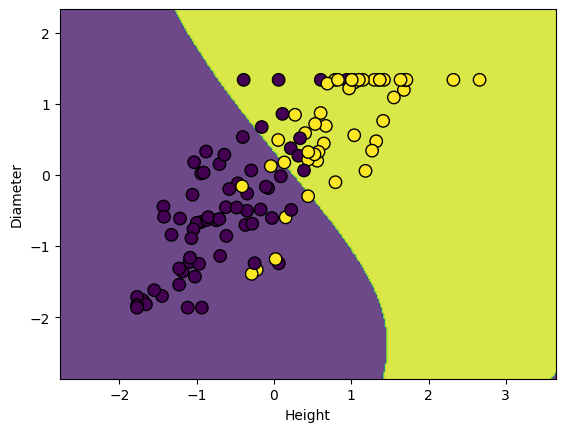

In [11]:
# Plot decision boundaries
plot_decision_boundaries(svm_rbf, X_train[:, :2], y_train, X_train[:, 2].mean())
plt.show()